<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Gradient-descent-in-two-dimension" data-toc-modified-id="Gradient-descent-in-two-dimension-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gradient descent in two dimension</a></span><ul class="toc-item"><li><span><a href="#Three-Hump-Camel-Function" data-toc-modified-id="Three-Hump-Camel-Function-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Three-Hump Camel Function</a></span><ul class="toc-item"><li><span><a href="#Illustrate-the-loss-function" data-toc-modified-id="Illustrate-the-loss-function-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Illustrate the loss function</a></span></li></ul></li><li><span><a href="#Plain-Vanilla-Gradient-Descent" data-toc-modified-id="Plain-Vanilla-Gradient-Descent-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plain Vanilla Gradient Descent</a></span><ul class="toc-item"><li><span><a href="#Define-the-two-dimension-gradient-descent-function" data-toc-modified-id="Define-the-two-dimension-gradient-descent-function-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Define the two dimension gradient descent function</a></span></li><li><span><a href="#First-experiment-with-step-size-0.01" data-toc-modified-id="First-experiment-with-step-size-0.01-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>First experiment with step size 0.01</a></span></li><li><span><a href="#Second-experiment-with-step-size-0.001" data-toc-modified-id="Second-experiment-with-step-size-0.001-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Second experiment with step size 0.001</a></span></li><li><span><a href="#Third-experiment-with-step-size-0.0001" data-toc-modified-id="Third-experiment-with-step-size-0.0001-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Third experiment with step size 0.0001</a></span></li><li><span><a href="#Graphical-illustrations-of-all-three-experiments-with-different-step-sizes" data-toc-modified-id="Graphical-illustrations-of-all-three-experiments-with-different-step-sizes-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Graphical illustrations of all three experiments with different step sizes</a></span></li></ul></li><li><span><a href="#Experiment-with-two-variants-of-gradient-descent" data-toc-modified-id="Experiment-with-two-variants-of-gradient-descent-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Experiment with two variants of gradient descent</a></span><ul class="toc-item"><li><span><a href="#momentum" data-toc-modified-id="momentum-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>momentum</a></span></li><li><span><a href="#Nesterov’s-Accelerated-Gradient-(NAG)" data-toc-modified-id="Nesterov’s-Accelerated-Gradient-(NAG)-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Nesterov’s Accelerated Gradient (NAG)</a></span></li></ul></li><li><span><a href="#graph-output(momentum)" data-toc-modified-id="graph-output(momentum)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>graph output(momentum)</a></span></li><li><span><a href="#graph-output(Nesterov’s-Accelerated-Gradient)" data-toc-modified-id="graph-output(Nesterov’s-Accelerated-Gradient)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>graph output(Nesterov’s Accelerated Gradient)</a></span></li></ul></li></ul></div>

# Gradient descent in two dimension

Contents
 - Define a loss function to minimise,illustration of the loss function by graphs
 - Experiments of gradient descent decreasing step sizes, illustrate by graphs
 - Experiments of gradient descent changing two variants, illustrate by graphs

In [167]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import matplotlib as mpl
import math
from mpl_toolkits.mplot3d import Axes3D
import warnings
%matplotlib inline

## Three-Hump Camel Function

Dimensions: 2 


In [168]:
#loss function
def fn_loss(x1,x2):
    term1 = 2*x1**2
    term2 = -1.05*x1**4
    term3 = x1**6 / 6
    term4 = x1*x2
    term5 = x2**2
    
    y = term1 + term2 + term3 + term4 + term5
    return y

#Gradient function
def fn_grad1(x1,x2):
    y = 4*x1-4.2*x1**3+x1**5+x2
    return y


def fn_grad2(x1,x2):
    y = x1+2*x2
    return y

### Illustrate the loss function

In [169]:
x1 = np.arange(-5, 5, 0.1)
x2 = np.arange(-5, 5, 0.1)
X1, X2 = np.meshgrid(x1, x2)
Z = fn_loss(X1,X2)

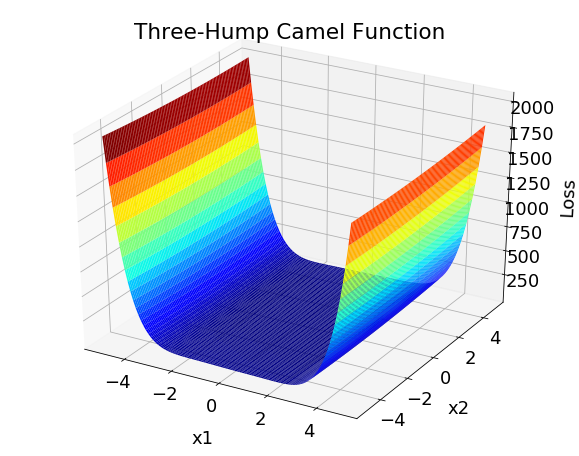

In [170]:
font = {'size': 18}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection="3d")
ax.plot_surface(X1,X2,Z,rstride=1,cstride=1,cmap=plt.cm.jet)
ax.set_title('Three-Hump Camel Function')
ax.set_xlabel('\nx1',linespacing=3.2)
ax.set_ylabel('\nx2',linespacing=3.2)
ax.set_zlabel('\nLoss',linespacing=2.5)

plt.show()

## Plain Vanilla Gradient Descent

Contents:
 - Investigation of the ability of this gradient descent to find the global minimum
 - Experiments with different step sizes **(0.01,0.001,0.0001)** ,the number of iteration chosen is **1000**
 - Graphical output of above experiments
 - Experiment with two variants of gradient descent
 - Graphical output of above experiment

### Define the two dimension gradient descent function

In [171]:
def gd_fun(n_iter,fn_grad1,fn_grad2,fn_loss,eta,tol,x1,x2):
    loss_path = [fn_loss(x1,x2)]
    x1_path = [x1]
    x2_path =[x2]
    y_change = fn_loss(x1,x2)
    iter_num = 0
    
    
    g1 = fn_grad1(x1,x2)
    g2 = fn_grad2(x1,x2)
    
    while (y_change > tol and iter_num < n_iter) :
        tmp_x1 = x1 - eta * fn_grad1(x1,x2)
        tmp_x2 = x2 - eta * fn_grad1(x1,x2)
        tmp_y = fn_loss(tmp_x1,tmp_x2)
        y_change = np.absolute(tmp_y - fn_loss(x1,x2))
        x1 = tmp_x1
        x2 = tmp_x2
        
        loss_path.append(tmp_y)
        x1_path.append(x1)
        x2_path.append(x2)
        iter_num += 1
    return loss_path,x1_path,x2_path 



### First experiment with step size 0.01

In [222]:
n_iter = 10000 # number of iterations
eta = 0.01 # step size
tol = 1e-5 # tolerance

#Starting point
x1=3
x2=3

loss_path_first, x1_path_first, x2_path_first=gd_fun(n_iter,fn_grad1,fn_grad2,fn_loss,eta,tol,x1,x2)
    
print('Steps:',len(x2_path_first), '--- with step size',eta,'and 1000 iteration')
print('The minimum of the loss function is',np.min(loss_path_first))
print('The correspoding x1 and x2 are',x1_path_first[-1],'and',x2_path_first[-1])

Steps: 170 --- with step size 0.01 and 1000 iteration
The minimum of the loss function is 8.831965255885274e-05
The correspoding x1 and x2 are 0.004698940424757615 and 0.004698940424757615


### Second experiment with step size 0.001

In [223]:
n_iter = 10000 # number of iterations
eta = 0.001 # step size
tol = 1e-5 # tolerance

#Starting point
x1=3
x2=3

loss_path_second, x1_path_second, x2_path_second=gd_fun(n_iter,fn_grad1,fn_grad2,fn_loss,eta,tol,x1,x2)

print('Steps:',len(x2_path_second), '--- with step size',eta,'and 1000 iteration')
print('The minimum of the loss function is',np.min(loss_path_second))
print('The correspoding x1 and x2 are',x1_path_second[-1],'and',x2_path_second[-1])

Steps: 1667 --- with step size 0.001 and 1000 iteration
The minimum of the loss function is 0.0009871231386433313
The correspoding x1 and x2 are 0.01570976678866748 and 0.01570976678866748


### Third experiment with step size 0.0001

In [224]:
n_iter = 10000 # number of iterations
eta = 0.0001 # step size
tol = 1e-5 # tolerance

#Starting point
x1=3
x2=3

loss_path_third, x1_path_third, x2_path_third=gd_fun(n_iter,fn_grad1,fn_grad2,fn_loss,eta,tol,x1,x2)

print('Steps:',len(x2_path_third), '--- with step size',eta,'and 1000 iteration')
print('The minimum of the loss function is',np.min(loss_path_third))
print('The correspoding x1 and x2 are',x1_path_third[-1],'and',x2_path_third[-1])

Steps: 10001 --- with step size 0.0001 and 1000 iteration
The minimum of the loss function is 0.6562370250565341
The correspoding x1 and x2 are 0.41421781212539727 and 0.41421781212539727


### Graphical illustrations of all three experiments with different step sizes

Text(0.5,0,'\nLoss')

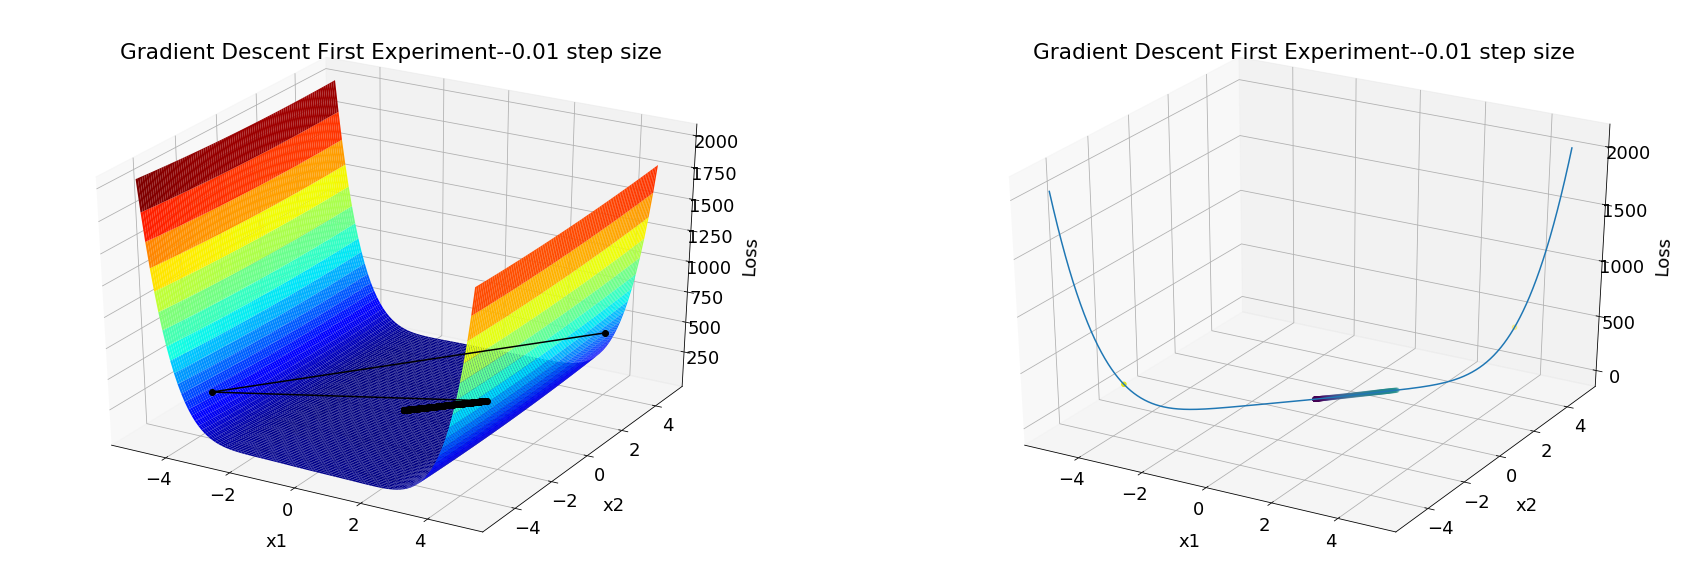

In [175]:
fig = plt.figure(facecolor='w',figsize=(30,10))

cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(loss_path_first - np.min(loss_path_first)+0.1)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))
colours = [cmap(normalize(value)) for value in lst_loss_log]

x1_range = np.arange(-5, 5, 0.01)
x2_range = np.arange(-5, 5, 0.01)
z_range = fn_loss(x1_range,x2_range)

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax1.plot_surface(X1,X2,Z,rstride=1,cstride=1,cmap=plt.cm.jet)
ax1.plot(x1_path_first,x2_path_first,loss_path_first,'ko-')
ax2.plot(x1_range,x2_range,z_range)
ax2.scatter(x1_path_first,x2_path_first,loss_path_first,color = colours)



ax1.set_title('\nGradient Descent First Experiment--0.01 step size',linespacing=2)
ax1.set_xlabel('\nx1',linespacing=3.2)
ax1.set_ylabel('\nx2',linespacing=3.2)
ax1.set_zlabel('\nLoss',linespacing=2.5)

ax2.set_title('\nGradient Descent First Experiment--0.01 step size',linespacing=2)
ax2.set_xlabel('\nx1',linespacing=3.2)
ax2.set_ylabel('\nx2',linespacing=3.2)
ax2.set_zlabel('\nLoss',linespacing=2.5)


Text(0.5,0,'\nLoss')

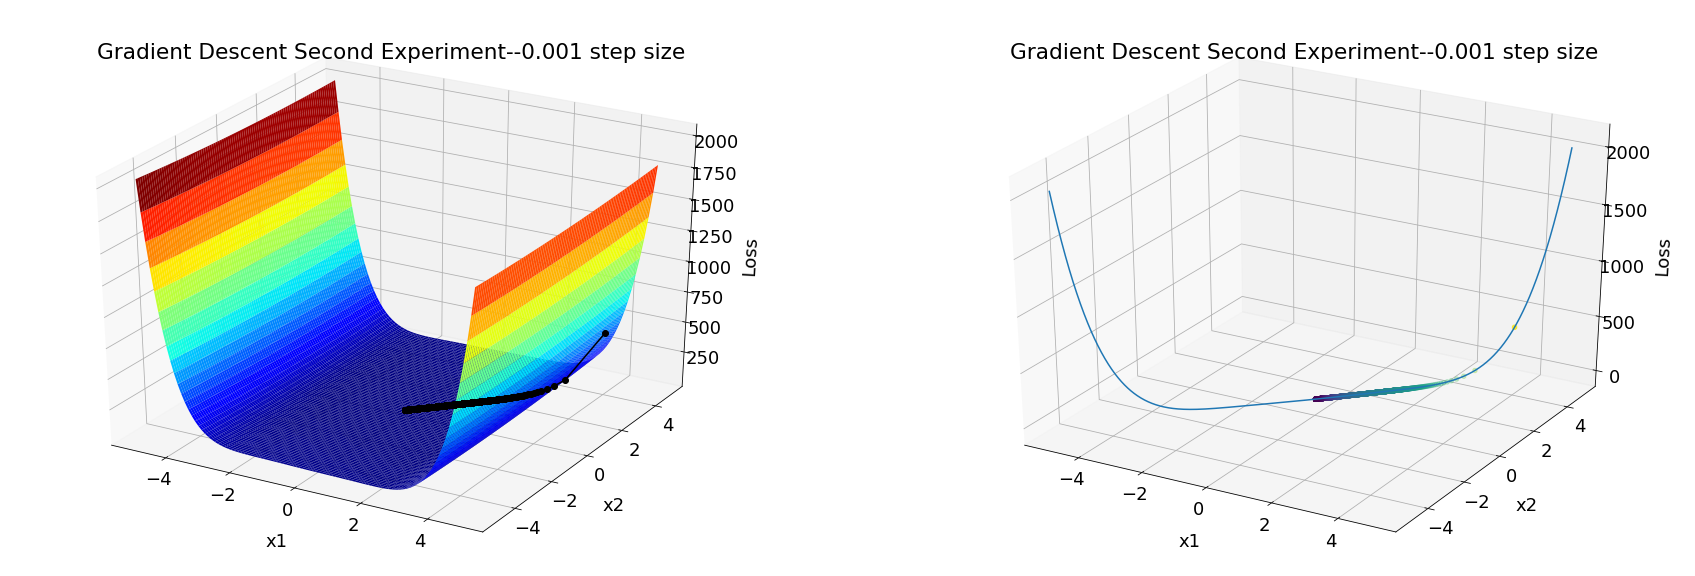

In [176]:
fig = plt.figure(facecolor='w',figsize=(30,10))

cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(loss_path_second - np.min(loss_path_second)+0.1)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))
colours = [cmap(normalize(value)) for value in lst_loss_log]

x1_range = np.arange(-5, 5, 0.01)
x2_range = np.arange(-5, 5, 0.01)
z_range = fn_loss(x1_range,x2_range)

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax1.plot_surface(X1,X2,Z,rstride=1,cstride=1,cmap=plt.cm.jet)
ax1.plot(x1_path_second,x2_path_second,loss_path_second,'ko-')
ax2.plot(x1_range,x2_range,z_range)
ax2.scatter(x1_path_second,x2_path_second,loss_path_second,color = colours)



ax1.set_title('\nGradient Descent Second Experiment--0.001 step size',linespacing=2)
ax1.set_xlabel('\nx1',linespacing=3.2)
ax1.set_ylabel('\nx2',linespacing=3.2)
ax1.set_zlabel('\nLoss',linespacing=2.5)

ax2.set_title('\nGradient Descent Second Experiment--0.001 step size',linespacing=2)
ax2.set_xlabel('\nx1',linespacing=3.2)
ax2.set_ylabel('\nx2',linespacing=3.2)
ax2.set_zlabel('\nLoss',linespacing=2.5)

Text(0.5,0,'\nLoss')

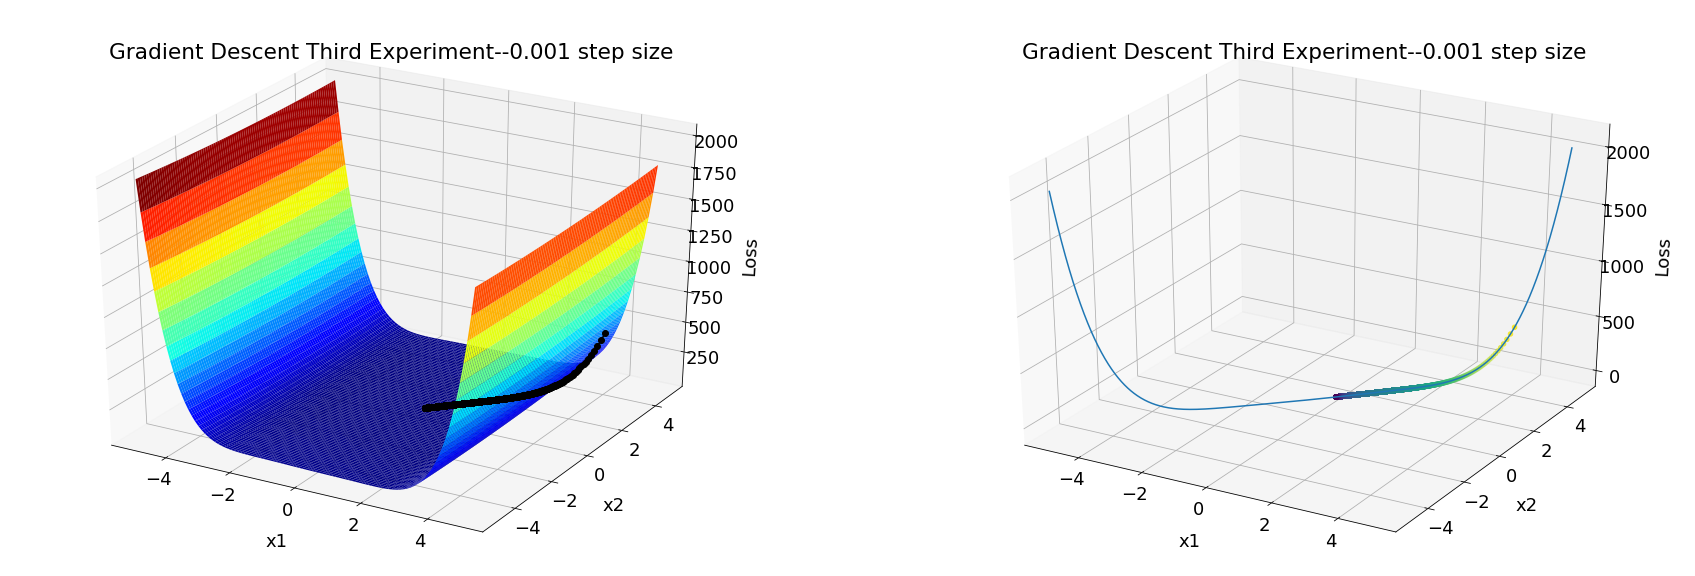

In [177]:
fig = plt.figure(facecolor='w',figsize=(30,10))

cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(loss_path_third - np.min(loss_path_third)+0.1)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))
colours = [cmap(normalize(value)) for value in lst_loss_log]

x1_range = np.arange(-5, 5, 0.01)
x2_range = np.arange(-5, 5, 0.01)
z_range = fn_loss(x1_range,x2_range)

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax1.plot_surface(X1,X2,Z,rstride=1,cstride=1,cmap=plt.cm.jet)
ax1.plot(x1_path_third,x2_path_third,loss_path_third,'ko-')
ax2.plot(x1_range,x2_range,z_range)
ax2.scatter(x1_path_third,x2_path_third,loss_path_third,color = colours)



ax1.set_title('\nGradient Descent Third Experiment--0.001 step size',linespacing=2)
ax1.set_xlabel('\nx1',linespacing=3.2)
ax1.set_ylabel('\nx2',linespacing=3.2)
ax1.set_zlabel('\nLoss',linespacing=2.5)

ax2.set_title('\nGradient Descent Third Experiment--0.001 step size',linespacing=2)
ax2.set_xlabel('\nx1',linespacing=3.2)
ax2.set_ylabel('\nx2',linespacing=3.2)
ax2.set_zlabel('\nLoss',linespacing=2.5)

In [232]:
## step size vs function minimum value

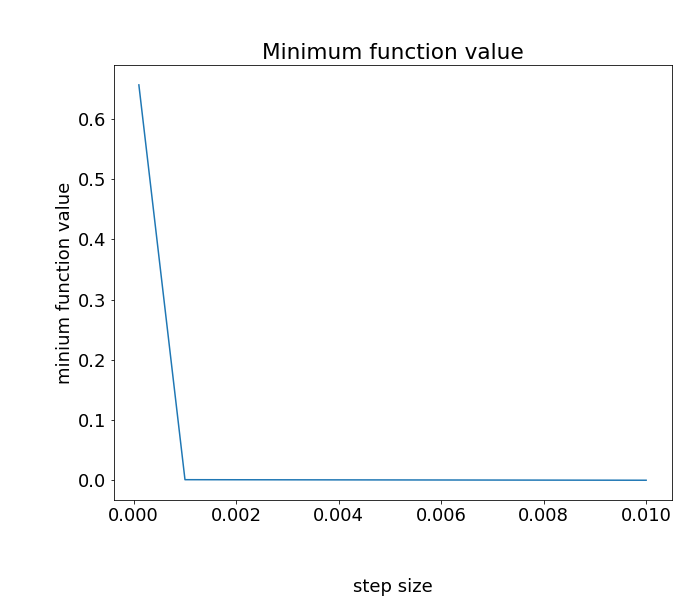

In [259]:
stepsize = np.array([0.01,0.001,0.0001])
minfunction = np.array([np.min(loss_path_first),np.min(loss_path_second),np.min(loss_path_third)])
fig = plt.figure(figsize=(10,8))
plt.plot(stepsize,minfunction)
plt.title('\nMinimum function value',linespacing=2)
plt.xlabel('\nstep size',linespacing=3.2)
plt.ylabel('\nminium function value',linespacing=3.2)
plt.show()

In [ ]:
## step size vs the number of iteration

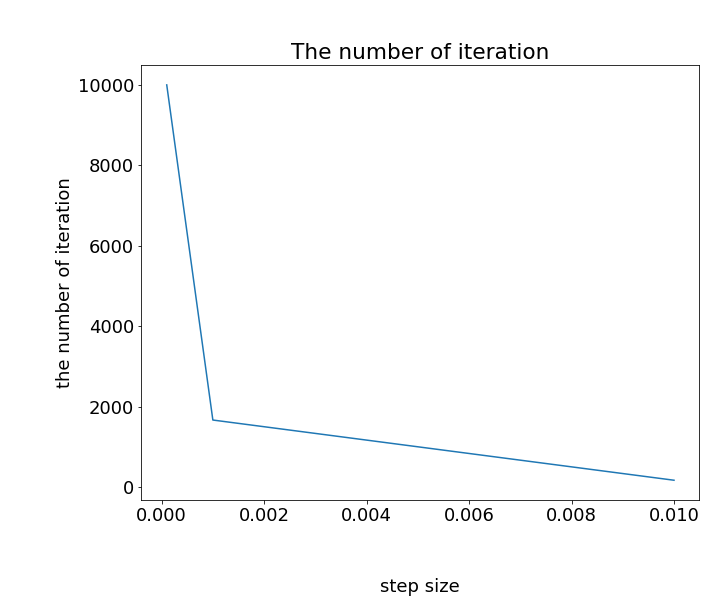

In [260]:
stepsize = np.array([0.01,0.001,0.0001])
niteration = np.array([len(x2_path_first),len(x2_path_second),len(x2_path_third)])
fig = plt.figure(figsize=(10,8))
plt.plot(stepsize,niteration)
plt.title('\nThe number of iteration',linespacing=2)
plt.xlabel('\nstep size',linespacing=3.2)
plt.ylabel('\nthe number of iteration',linespacing=3.2)
plt.show()

## Experiment with two variants of gradient descent



### momentum

In [226]:
def momentum_fun(n_iter,fn_grad1,fn_grad2,fn_loss,eta,tol,x1,x2):
    loss_path = [fn_loss(x1,x2)]
    x1_path = [x1]
    x2_path =[x2]
    y_change = fn_loss(x1,x2)
    iter_num = 0
    moment = 0.9
    g1 = fn_grad1(x1,x2)
    g2 = fn_grad2(x1,x2)
    v1 = 0
    v2 = 0
    while (y_change > tol and iter_num < n_iter) :
        
        v1 = eta * fn_grad1(x1,x2) + moment*v1
        v2 = eta * fn_grad1(x1,x2) + moment*v2
        tmp_x1 = x1 - v1 
        tmp_x2 = x2 - v2 
        tmp_y = fn_loss(tmp_x1,tmp_x2)
        y_change = np.absolute(tmp_y - fn_loss(x1,x2))
        x1 = tmp_x1
        x2 = tmp_x2
        
        loss_path.append(tmp_y)
        x1_path.append(x1)
        x2_path.append(x2)
        iter_num += 1
    return loss_path,x1_path,x2_path 

In [227]:
n_iter = 10000 # number of iterations
eta = 0.01 # step size
tol = 1e-5 # tolerance

#Starting point
x1=3
x2=3

loss_path_mofirst, x1_path_mofirst, x2_path_mofirst=momentum_fun(n_iter,fn_grad1,fn_grad2,fn_loss,eta,tol,x1,x2)
    
print('Steps:',len(x2_path_mofirst), '--- with step size',eta,'and 1000 iteration')
print('The minimum of the loss function is',np.min(loss_path_mofirst))
print('The correspoding x1 and x2 are',x1_path_first[-1],'and',x2_path_mofirst[-1])

Steps: 106 --- with step size 0.01 and 1000 iteration
The minimum of the loss function is 1.7234130132528595e-05
The correspoding x1 and x2 are 0.004698940424757615 and 0.016082203353439847


In [228]:
n_iter = 10000 # number of iterations
eta = 0.001 # step size
tol = 1e-5 # tolerance

#Starting point
x1=3
x2=3

loss_path_mosecond, x1_path_mosecond, x2_path_mosecond=momentum_fun(n_iter,fn_grad1,fn_grad2,fn_loss,eta,tol,x1,x2)

print('Steps:',len(x2_path_mosecond), '--- with step size',eta,'and 1000 iteration')
print('The minimum of the loss function is',np.min(loss_path_mosecond))
print('The correspoding x1 and x2 are',x1_path_mosecond[-1],'and',x2_path_mosecond[-1])

Steps: 88 --- with step size 0.001 and 1000 iteration
The minimum of the loss function is 3.3266572502378053e-06
The correspoding x1 and x2 are 0.0014453974315703877 and 0.0014453974315703877


In [229]:
n_iter = 10000 # number of iterations
eta = 0.0001 # step size
tol = 1e-5 # tolerance

#Starting point
x1=3
x2=3

loss_path_mothird, x1_path_mothird, x2_path_mothird=momentum_fun(n_iter,fn_grad1,fn_grad2,fn_loss,eta,tol,x1,x2)

print('Steps:',len(x2_path_mothird), '--- with step size',eta,'and 1000 iteration')
print('The minimum of the loss function is',np.min(loss_path_mothird))
print('The correspoding x1 and x2 are',x1_path_mothird[-1],'and',x2_path_mothird[-1])

Steps: 1541 --- with step size 0.0001 and 1000 iteration
The minimum of the loss function is 0.0009450723284481587
The correspoding x1 and x2 are 0.015371491040704774 and 0.015371491040704774


Text(0.5,0,'\nLoss')

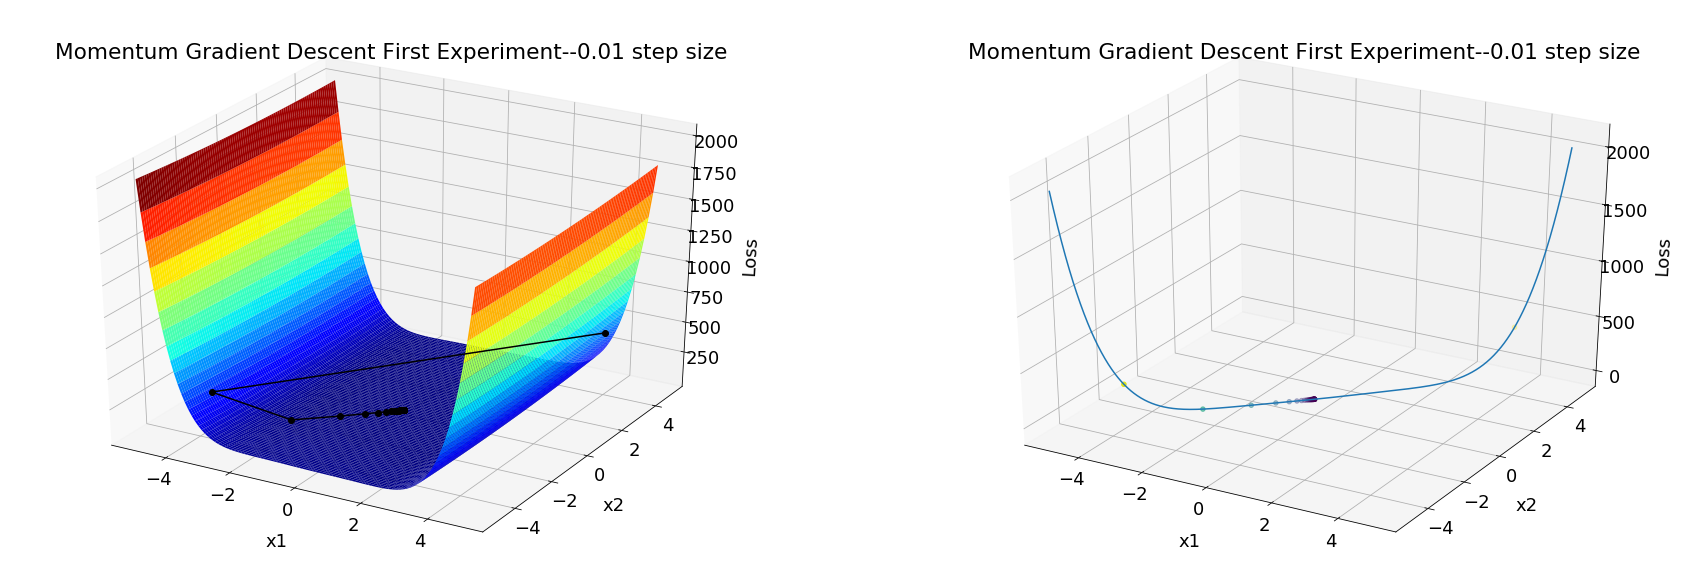

In [159]:
fig = plt.figure(facecolor='w',figsize=(30,10))

cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(loss_path_mofirst - np.min(loss_path_mofirst)+0.1)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))
colours = [cmap(normalize(value)) for value in lst_loss_log]

x1_range = np.arange(-5, 5, 0.01)
x2_range = np.arange(-5, 5, 0.01)
z_range = fn_loss(x1_range,x2_range)

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax1.plot_surface(X1,X2,Z,rstride=1,cstride=1,cmap=plt.cm.jet)
ax1.plot(x1_path_mofirst,x2_path_mofirst,loss_path_mofirst,'ko-')
ax2.plot(x1_range,x2_range,z_range)
ax2.scatter(x1_path_mofirst,x2_path_mofirst,loss_path_mofirst,color = colours)



ax1.set_title('\nMomentum Gradient Descent First Experiment--0.01 step size',linespacing=2)
ax1.set_xlabel('\nx1',linespacing=3.2)
ax1.set_ylabel('\nx2',linespacing=3.2)
ax1.set_zlabel('\nLoss',linespacing=2.5)

ax2.set_title('\nMomentum Gradient Descent First Experiment--0.01 step size',linespacing=2)
ax2.set_xlabel('\nx1',linespacing=3.2)
ax2.set_ylabel('\nx2',linespacing=3.2)
ax2.set_zlabel('\nLoss',linespacing=2.5)

Text(0.5,0,'\nLoss')

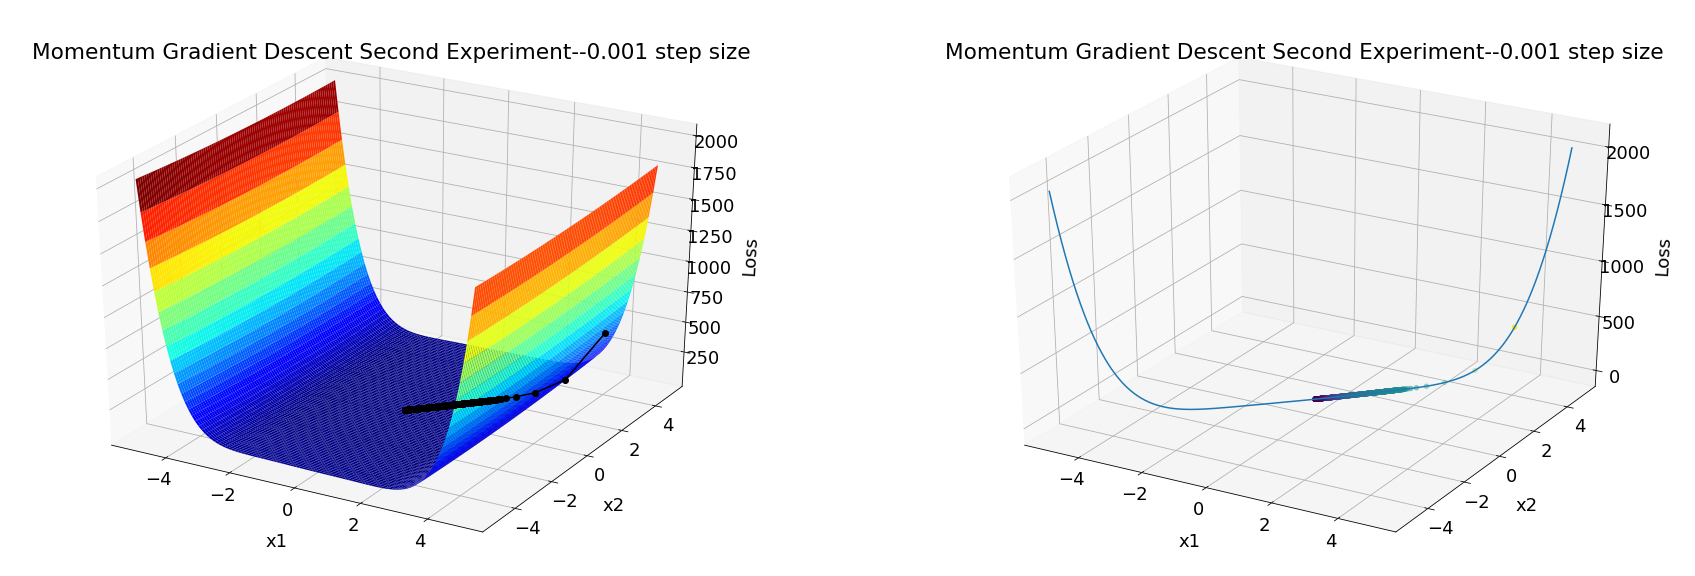

In [161]:
fig = plt.figure(facecolor='w',figsize=(30,10))

cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(loss_path_mosecond - np.min(loss_path_mosecond)+0.1)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))
colours = [cmap(normalize(value)) for value in lst_loss_log]

x1_range = np.arange(-5, 5, 0.01)
x2_range = np.arange(-5, 5, 0.01)
z_range = fn_loss(x1_range,x2_range)

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax1.plot_surface(X1,X2,Z,rstride=1,cstride=1,cmap=plt.cm.jet)
ax1.plot(x1_path_mosecond,x2_path_mosecond,loss_path_mosecond,'ko-')
ax2.plot(x1_range,x2_range,z_range)
ax2.scatter(x1_path_mosecond,x2_path_mosecond,loss_path_mosecond,color = colours)



ax1.set_title('\nMomentum Gradient Descent Second Experiment--0.001 step size',linespacing=2)
ax1.set_xlabel('\nx1',linespacing=3.2)
ax1.set_ylabel('\nx2',linespacing=3.2)
ax1.set_zlabel('\nLoss',linespacing=2.5)

ax2.set_title('\nMomentum Gradient Descent Second Experiment--0.001 step size',linespacing=2)
ax2.set_xlabel('\nx1',linespacing=3.2)
ax2.set_ylabel('\nx2',linespacing=3.2)
ax2.set_zlabel('\nLoss',linespacing=2.5)

Text(0.5,0,'\nLoss')

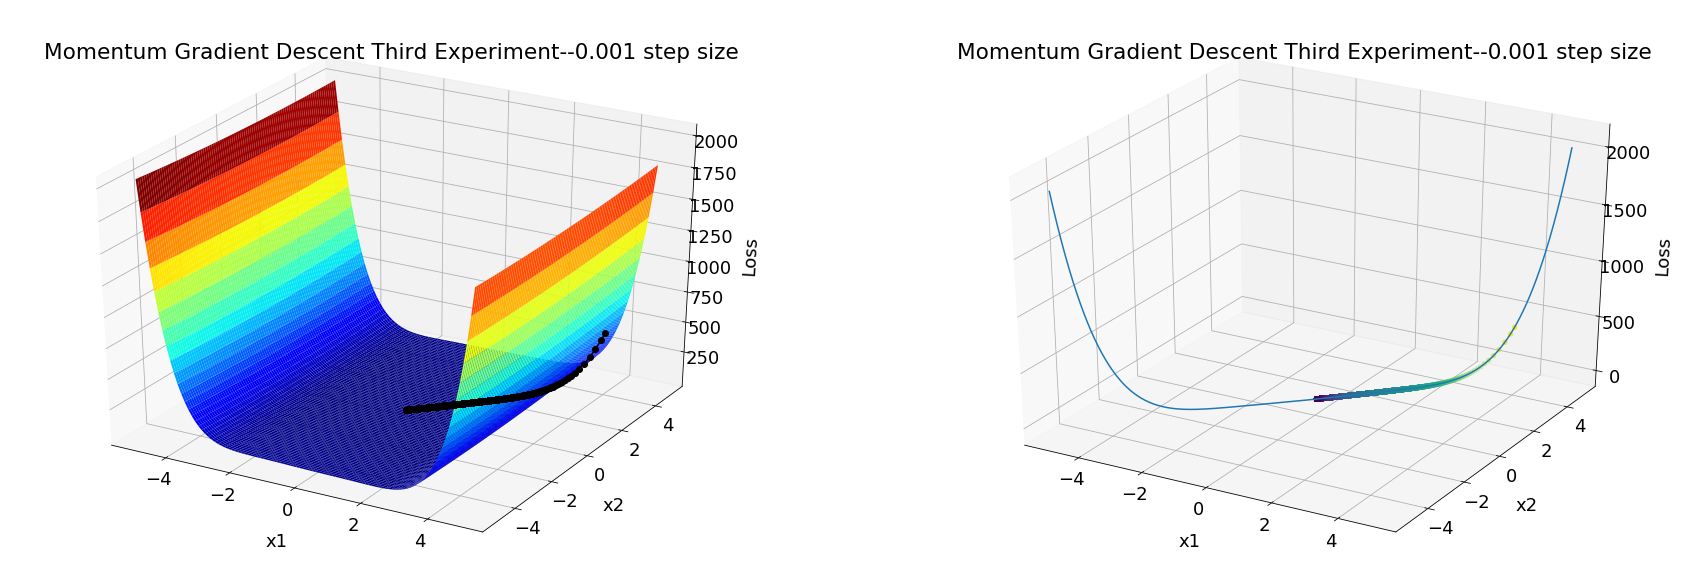

In [162]:
fig = plt.figure(facecolor='w',figsize=(30,10))

cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(loss_path_mothird - np.min(loss_path_mothird)+0.1)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))
colours = [cmap(normalize(value)) for value in lst_loss_log]

x1_range = np.arange(-5, 5, 0.01)
x2_range = np.arange(-5, 5, 0.01)
z_range = fn_loss(x1_range,x2_range)

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax1.plot_surface(X1,X2,Z,rstride=1,cstride=1,cmap=plt.cm.jet)
ax1.plot(x1_path_mothird,x2_path_mothird,loss_path_mothird,'ko-')
ax2.plot(x1_range,x2_range,z_range)
ax2.scatter(x1_path_mothird,x2_path_mothird,loss_path_mothird,color = colours)



ax1.set_title('\nMomentum Gradient Descent Third Experiment--0.001 step size',linespacing=2)
ax1.set_xlabel('\nx1',linespacing=3.2)
ax1.set_ylabel('\nx2',linespacing=3.2)
ax1.set_zlabel('\nLoss',linespacing=2.5)

ax2.set_title('\nMomentum Gradient Descent Third Experiment--0.001 step size',linespacing=2)
ax2.set_xlabel('\nx1',linespacing=3.2)
ax2.set_ylabel('\nx2',linespacing=3.2)
ax2.set_zlabel('\nLoss',linespacing=2.5)

### Nesterov’s Accelerated Gradient (NAG) 

In [215]:
def NAG_fun(n_iter,fn_grad1,fn_grad2,fn_loss,eta,tol,x1,x2):
    loss_path = [fn_loss(x1,x2)]
    x1_path = [x1]
    x2_path =[x2]
    y_change = fn_loss(x1,x2)
    iter_num = 0
    moment = 0.9
    g1 = fn_grad1(x1,x2)
    g2 = fn_grad2(x1,x2)
    v1 = 0
    v2 = 0
    while (y_change > tol and iter_num < n_iter) :
        
        v1 = moment*v1 + eta* fn_grad1(x1-moment*v1,x2)
        v2 = moment*v2 + eta* fn_grad2(x1,x2-moment*v2)
        tmp_x1 = x1 - v1 
        tmp_x2 = x2 - v2 
        tmp_y = fn_loss(tmp_x1,tmp_x2)
        y_change = np.absolute(tmp_y - fn_loss(x1,x2))
        x1 = tmp_x1
        x2 = tmp_x2
        
        loss_path.append(tmp_y)
        x1_path.append(x1)
        x2_path.append(x2)
        iter_num += 1
    return loss_path,x1_path,x2_path 

In [221]:
n_iter = 10000 # number of iterations
eta = 0.01 # step size
tol = 1e-5 # tolerance

#Starting point
x1=3
x2=3

loss_path_nagfirst, x1_path_nagfirst, x2_path_nagfirst=NAG_fun(n_iter,fn_grad1,fn_grad2,fn_loss,eta,tol,x1,x2)
    
print('Steps:',len(x2_path_nagfirst), '--- with step size',eta,'and 1000 iteration')
print('The minimum of the loss function is',np.min(loss_path_nagfirst))
print('The correspoding x1 and x2 are',x1_path_nagfirst[-1],'and',x2_path_nagfirst[-1])

Steps: 75 --- with step size 0.01 and 1000 iteration
The minimum of the loss function is 1.3438948094176508e-05
The correspoding x1 and x2 are -0.00016566562455687947 and -0.004494622307014782


In [230]:
n_iter = 10000 # number of iterations
eta = 0.001 # step size
tol = 1e-5 # tolerance

#Starting point
x1=3
x2=3

loss_path_nagsecond, x1_path_nagsecond, x2_path_nagsecond=NAG_fun(n_iter,fn_grad1,fn_grad2,fn_loss,eta,tol,x1,x2)

print('Steps:',len(x2_path_nagsecond), '--- with step size',eta,'and 1000 iteration')
print('The minimum of the loss function is',np.min(loss_path_nagsecond))
print('The correspoding x1 and x2 are',x1_path_nagsecond[-1],'and',x2_path_nagsecond[-1])

Steps: 283 --- with step size 0.001 and 1000 iteration
The minimum of the loss function is 0.0002576650744769888
The correspoding x1 and x2 are -0.006974177492190767 and 0.016622881187026626


In [231]:
n_iter = 10000 # number of iterations
eta = 0.0001 # step size
tol = 1e-5 # tolerance

#Starting point
x1=3
x2=3

loss_path_nagthird, x1_path_nagthird, x2_path_nagthird=NAG_fun(n_iter,fn_grad1,fn_grad2,fn_loss,eta,tol,x1,x2)

print('Steps:',len(x2_path_nagthird), '--- with step size',eta,'and 1000 iteration')
print('The minimum of the loss function is',np.min(loss_path_nagthird))
print('The correspoding x1 and x2 are',x1_path_nagthird[-1],'and',x2_path_nagthird[-1])

Steps: 1533 --- with step size 0.0001 and 1000 iteration
The minimum of the loss function is 0.0011526406317482053
The correspoding x1 and x2 are 0.02455564951202535 and -0.002388057617171091


## graph output(momentum)

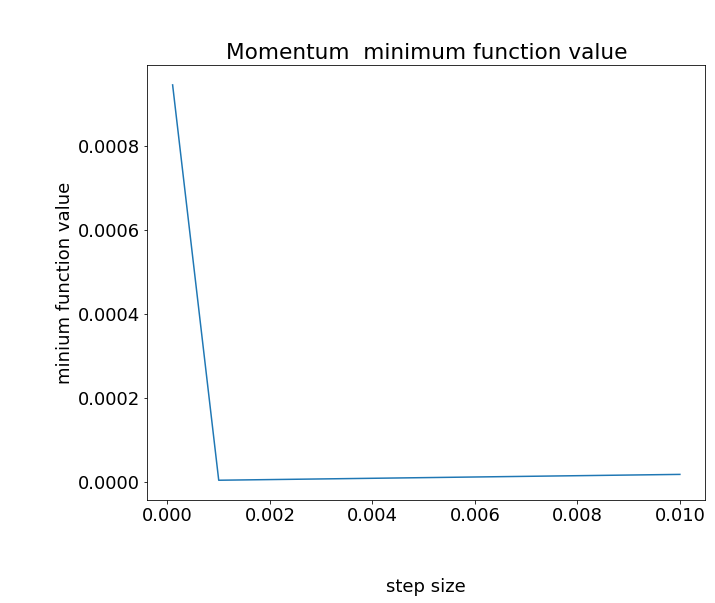

In [276]:
stepsize = np.array([0.01,0.001,0.0001])
minfunction = np.array([np.min(loss_path_mofirst),np.min(loss_path_mosecond),np.min(loss_path_mothird)])
fig = plt.figure(figsize=(10,8))
plt.plot(stepsize,minfunction)
plt.title('\nMomentum  minimum function value',linespacing=2)
plt.xlabel('\nstep size',linespacing=3.2)
plt.ylabel('\nminium function value',linespacing=3.2)
plt.show()

## graph output(Nesterov’s Accelerated Gradient)

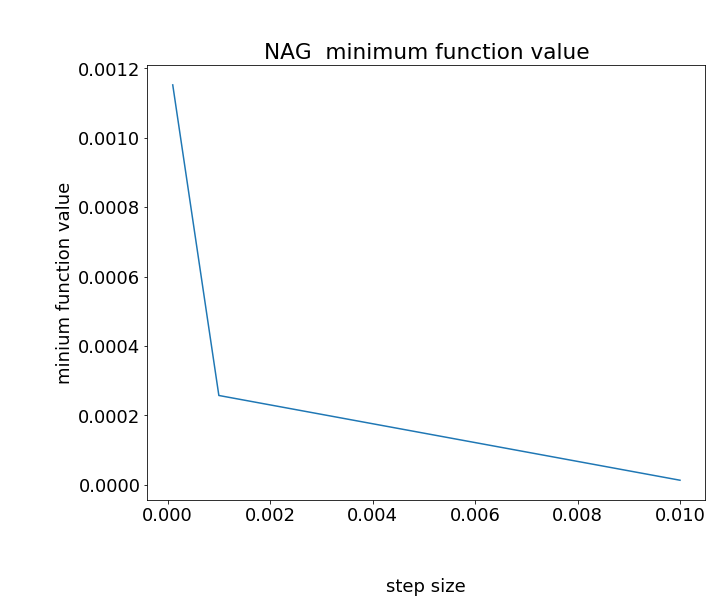

In [277]:
stepsize = np.array([0.01,0.001,0.0001])
minfunction = np.array([np.min(loss_path_nagfirst),np.min(loss_path_nagsecond),np.min(loss_path_nagthird)])
fig = plt.figure(figsize=(10,8))
plt.plot(stepsize,minfunction)
plt.title('\nNAG  minimum function value',linespacing=2)
plt.xlabel('\nstep size',linespacing=3.2)
plt.ylabel('\nminium function value',linespacing=3.2)
plt.show()